In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from numpy import pi, sin,cos, arctan2, sqrt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
def haversine_distance(p1,p2):
    lg1 = p1[0]
    lat1 = p1[1]
    lg2 = p2[0]
    lat2 = p2[1]

    R = 6371000
    phi1 = lat1 * pi / 180 #convert to radian
    phi2 = lat2 * pi / 180 #convert to radian
    delta_phi = (lat2 - lat1) * pi / 180
    delta_lambda = (lg2 - lg1) * pi / 180

    a = (sin(delta_phi/2))**2 + cos(phi1) * cos(phi2) * ((sin(delta_lambda/2))**2)
    c = 2 * arctan2(sqrt(a), sqrt(1-a))
    distance = R * c #haversine distance between point1 and point 2 in meters
    return round(distance, 2)

In [3]:
from kmeans2 import KMeansAlgorithm

In [4]:
flname="dataset_cluster_warehouse_exp_1.csv"
df = pd.read_csv(flname)
df


,province_name,city_name,district_name,lat_long,avg_demand_baseline,demand_target,njop_2021_min,njop_2021_max
0,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,"-6.1548792,106.7204645",153,230,2300.0,14000.0
1,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,"-6.1639643,106.7506821",387,581,3700.0,35000.0
2,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,"-6.1461655,106.8106198",114,171,7400.0,35400.0
3,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,"-6.146188,106.8079118",36,54,4700.0,35800.0
4,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,"-6.1915513,106.7481174",771,1157,7000.0,20700.0
...,...,...,...,...,...,...,...,...
63,JAWA BARAT,KOTA DEPOK,BEJI,"-6.3723053,106.7830725",378,832,NaN,NaN
64,JAWA BARAT,KOTA DEPOK,CIMANGGIS,"-6.3723053,106.7830725",231,508,NaN,NaN
65,JAWA BARAT,KOTA DEPOK,CINERE,"-6.3324008,106.7732734",495,1089,NaN,NaN
66,JAWA BARAT,KOTA DEPOK,LIMO,"-6.3663032,106.7621014",264,581,NaN,NaN


In [5]:
# add distancce in dataframe from current loc

data_lat = []
data_long = []
for idx, row in df.iterrows():
    point = row['lat_long'].split(',')
    lat = float(point[0])
    long = float(point[1])
    data_lat.append(lat)
    data_long.append(long)

df = df.assign(lat=data_lat, long=data_long)
dataset = df[['city_name', 'district_name', 'avg_demand_baseline', 'demand_target', 'lat', 'long']]
dataset

,city_name,district_name,avg_demand_baseline,demand_target,lat,long
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,153,230,-6.154879,106.720465
1,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,387,581,-6.163964,106.750682
2,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,114,171,-6.146166,106.810620
3,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,36,54,-6.146188,106.807912
4,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,771,1157,-6.191551,106.748117
...,...,...,...,...,...,...
63,KOTA DEPOK,BEJI,378,832,-6.372305,106.783073
64,KOTA DEPOK,CIMANGGIS,231,508,-6.372305,106.783073
65,KOTA DEPOK,CINERE,495,1089,-6.332401,106.773273
66,KOTA DEPOK,LIMO,264,581,-6.366303,106.762101


In [6]:
#Rescaling
scaler = StandardScaler()
dataset_to_scale = dataset[['lat', 'long']]
unscaled_dataset = dataset_to_scale
# dataset_scaled = scaler.fit_transform(dataset_to_scale)
# unscaled_dataset

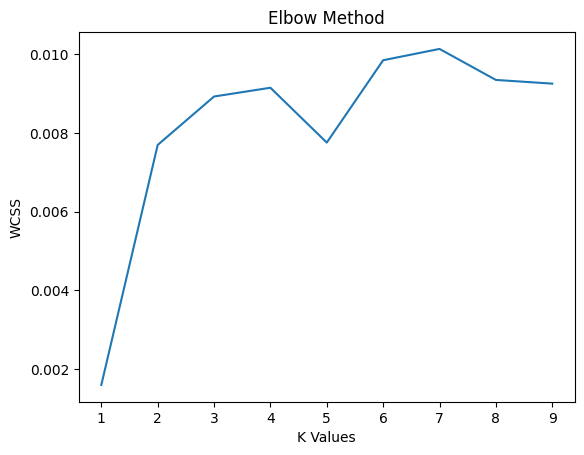

In [7]:
#elbow method

wcss = []
#trying from 1 to 15 cluster to get intertia
crange = 10
kmeans = KMeansAlgorithm(unscaled_dataset, crange)
kmeans.fit_model(300)
kmeans.plot_elbow()

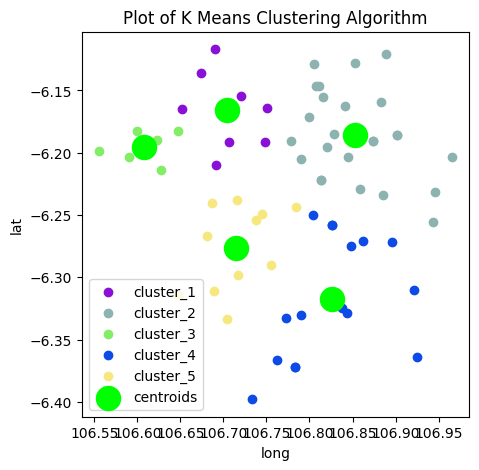

In [8]:
km = KMeansAlgorithm(unscaled_dataset, 5)
km.fit_model(200)
km.plot_kmeans()

In [9]:
km.centroids

array([[ -6.16611786,  -6.18570429,  -6.1952137 ,  -6.31770774,
         -6.27622108],
       [106.70420542, 106.85319964, 106.60758553, 106.82602093,
        106.71498175]])

In [10]:
y_km = km.predict()
#assign y pred to dataset
pred_result = [0 for i in range(dataset.shape[0])]
for prediction in y_km[0].keys():
    for d in y_km[0][prediction]:
        idx = dataset[(dataset["lat"]==d[0]) & (dataset["long"]==d[1])].index.tolist()
        for id in idx:
            pred_result[id] = prediction
dataset = dataset.assign(pred=pred_result)
dataset.sort_values("pred")

,city_name,district_name,avg_demand_baseline,demand_target,lat,long,pred
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,153,230,-6.154879,106.720465,1
1,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,387,581,-6.163964,106.750682,1
4,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,771,1157,-6.191551,106.748117,1
5,KOTA ADMINISTRASI JAKARTA BARAT,KALIDERES,171,257,-6.136145,106.673880,1
7,KOTA ADMINISTRASI JAKARTA BARAT,KEMBANGAN,327,491,-6.191139,106.706286,1
...,...,...,...,...,...,...,...
15,KOTA ADMINISTRASI JAKARTA SELATAN,PESANGGRAHAN,273,410,-6.254297,106.737678,5
44,KOTA TANGERANG,CILEDUG,231,508,-6.240094,106.687349,5
49,KOTA TANGERANG,LARANGAN,123,271,-6.238229,106.715727,5
55,KOTA TANGERANG SELATAN,PONDOK AREN,396,871,-6.267233,106.680732,5
